# **SCATTER PLOT ANALYSIS**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

CONNECT TO DATABASE

In [2]:
# Connect to Database
conn = sqlite3.connect('my_analysis.db')

# Check
query = "SELECT * FROM main LIMIT 5"
pd.read_sql_query(query, conn)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


---

#### EXPLORING RELATIONSHIPS WITH SCATTER PLOTS

Scatter Plot for Age vs. Job Satisfaction

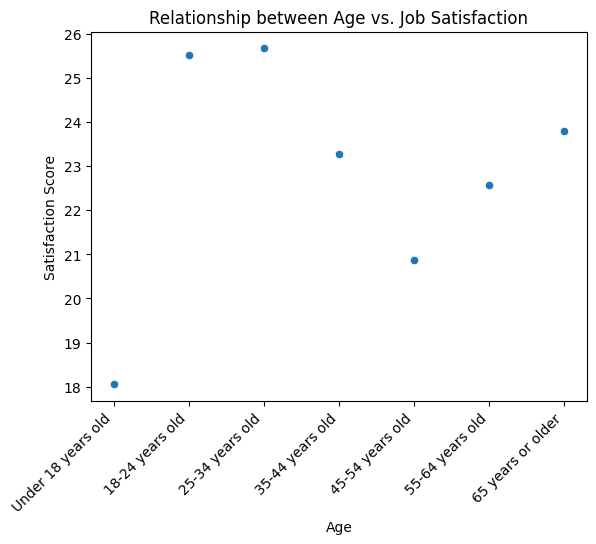

Correlation Coefficient: 0.09827661029516245


In [22]:
# Query the data
query = "SELECT Age, JobSatPoints_6 AS JobSat6 FROM main WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
age_job = pd.read_sql_query(query, conn)


# Create Order logic for Age column
age_order = ['Under 18 years old','18-24 years old', 
             '25-34 years old', '35-44 years old', '45-54 years old',
             '55-64 years old', '65 years or older', 'Prefer not to say']

# Convert to categories
age_job['Age'] = pd.Categorical(age_job['Age'], categories=age_order, ordered=True)

# Calculate the mean for satisfaction score
age_satisfaction = age_job.groupby('Age', observed=False)['JobSat6'].mean().reset_index()

# SCATTER PLOT
plot_df = age_satisfaction[age_satisfaction['Age'] != 'Prefer not to say'].copy()

sns.scatterplot(plot_df, x='Age', y='JobSat6')

plt.title("Relationship between Age vs. Job Satisfaction")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=45, ha='right')

plt.show()

# Check correlation coefficient
age_map = {'Under 18 years old': 17,
           '18-24 years old': 21, 
           '25-34 years old': 29.5, 
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '55-64 years old': 59.5, 
           '65 years or older': 65}

plot_df['Num_Age'] = plot_df['Age'].map(age_map)

print(f"Correlation Coefficient: {plot_df['Num_Age'].corr(plot_df['JobSat6'])}")

---

Scatter Plot for Compensation (ConvertedCompYearly) vs. Job Satisfaction (JobSatPoints_6)

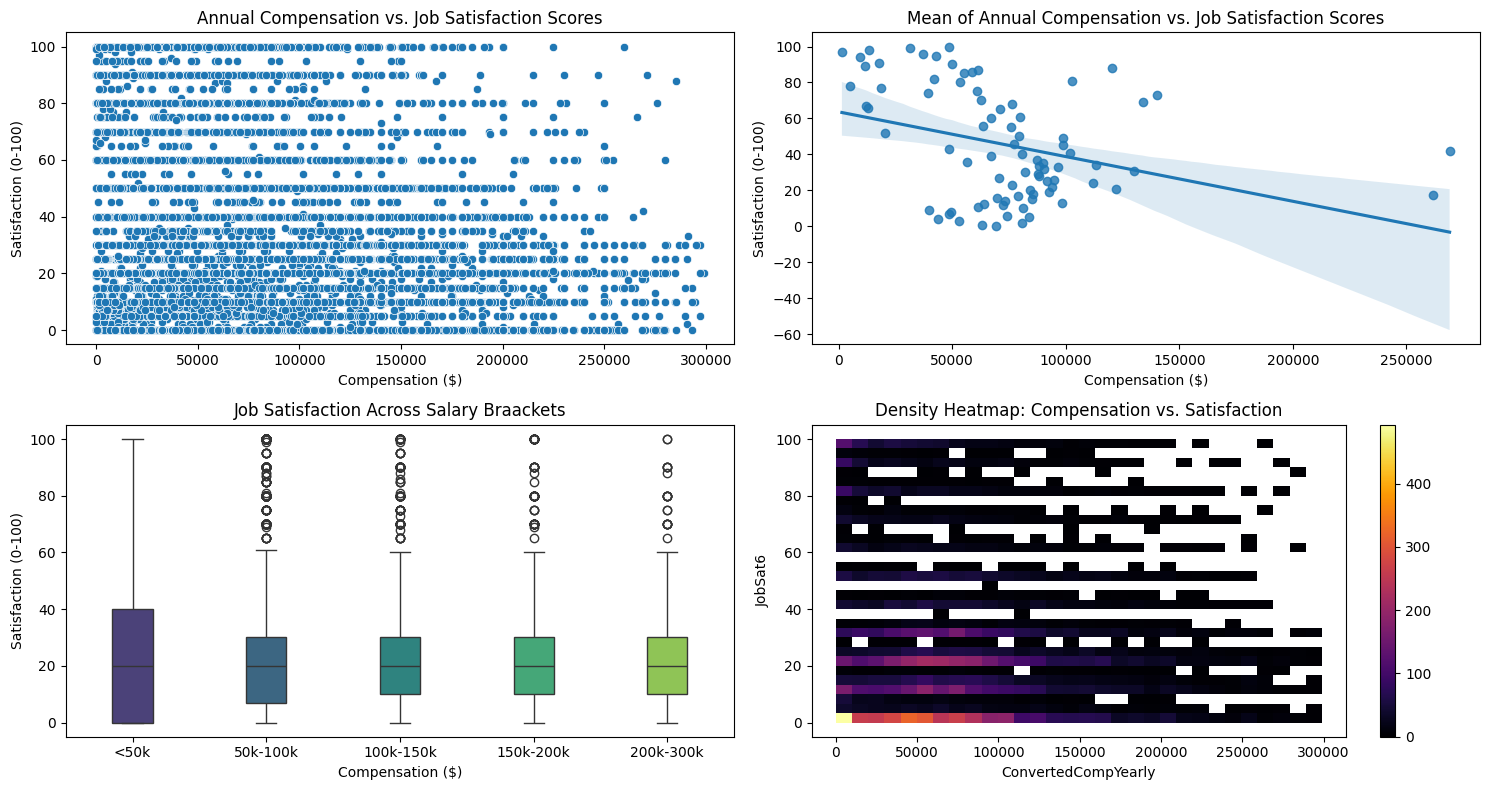

Correlation Coeff: -0.013715642220005554
Correlation Coeff of Mean Comp: -0.3596196633222786


In [45]:
# Query the data
query = "SELECT ConvertedCompYearly, JobSatPoints_6 AS JobSat6 FROM main WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
comp_sat = pd.read_sql_query(query, conn)

# Filter compensation to under 300000 (reasonable value)
filtered = comp_sat[comp_sat['ConvertedCompYearly'] < 300000].copy()

# Create a subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

# Scatter Plot original
sns.scatterplot(filtered, x='ConvertedCompYearly', y='JobSat6', ax=axes[0])
axes[0].set_title("Annual Compensation vs. Job Satisfaction Scores")
axes[0].set_xlabel("Compensation ($)")
axes[0].set_ylabel("Satisfaction (0-100)")

# Scatter Plot Mean of Compensation
# Mean Data
comp_mean = filtered.groupby('JobSat6')['ConvertedCompYearly'].mean().reset_index()

sns.regplot(comp_mean, x='ConvertedCompYearly', y='JobSat6', ax=axes[1])
axes[1].set_title("Mean of Annual Compensation vs. Job Satisfaction Scores")
axes[1].set_xlabel("Compensation ($)")
axes[1].set_ylabel("Satisfaction (0-100)")

# Box Plot (turn compensation into brackets)
bins = [-1, 50000, 100000, 150000, 200000, 300000]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k']
filtered['Salary_Bracket'] = pd.cut(filtered['ConvertedCompYearly'], bins=bins, labels=labels)

sns.boxplot(filtered, x='Salary_Bracket', y='JobSat6', palette='viridis', ax=axes[2], width=0.3, hue='Salary_Bracket', legend=False)
axes[2].set_title("Job Satisfaction Across Salary Braackets")
axes[2].set_xlabel("Compensation ($)")
axes[2].set_ylabel("Satisfaction (0-100)")


# Heatmap (Best for 'True' Data Density)
# 'bins' controls how pixelated the heatmap is
sns.histplot(data=filtered, x='ConvertedCompYearly', y='JobSat6', bins=30, cbar=True, cmap='inferno',ax=axes[3])
axes[3].set_title("Density Heatmap: Compensation vs. Satisfaction")

plt.tight_layout()
plt.show()


# Correlation Calculate
print(f"Correlation Coeff: {filtered['ConvertedCompYearly'].corr(filtered['JobSat6'], method='spearman')}")
print(f"Correlation Coeff of Mean Comp: {comp_mean['ConvertedCompYearly'].corr(comp_mean['JobSat6'], method='spearman')}")

While individual job satisfaction varies wildly (Raw Corr: -0.01), there is a visible negative trend at the aggregate level (Mean Corr: -0.36). Higher compensation brackets show slightly lower average satisfaction, likely due to increased stress or responsibility, though the median satisfaction remains relatively stable across all income levels